<a href="https://colab.research.google.com/github/PxKhadkekar/Crop-ML-Model/blob/main/crop_rec_sys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Install required libraries
!pip install pandas numpy matplotlib scikit-learn gradio opendatasets

In [16]:
# Download the dataset from Kaggle
import opendatasets as od

od.download("https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset")


Skipping, found downloaded files in "./crop-recommendation-dataset" (use force=True to force download)


In [17]:
# Load the dataset using pandas
import pandas as pd

df = pd.read_csv("/content/crop-recommendation-dataset/Crop_recommendation.csv")

# Display initial information about dataset
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [18]:
# Prepare data for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Split features (X) and target label (y)
X = df.drop('label', axis=1)
y = df['label']

# Encode the crop labels (e.g., rice, wheat -> 0, 1, ...)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [19]:
# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [20]:
# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        1

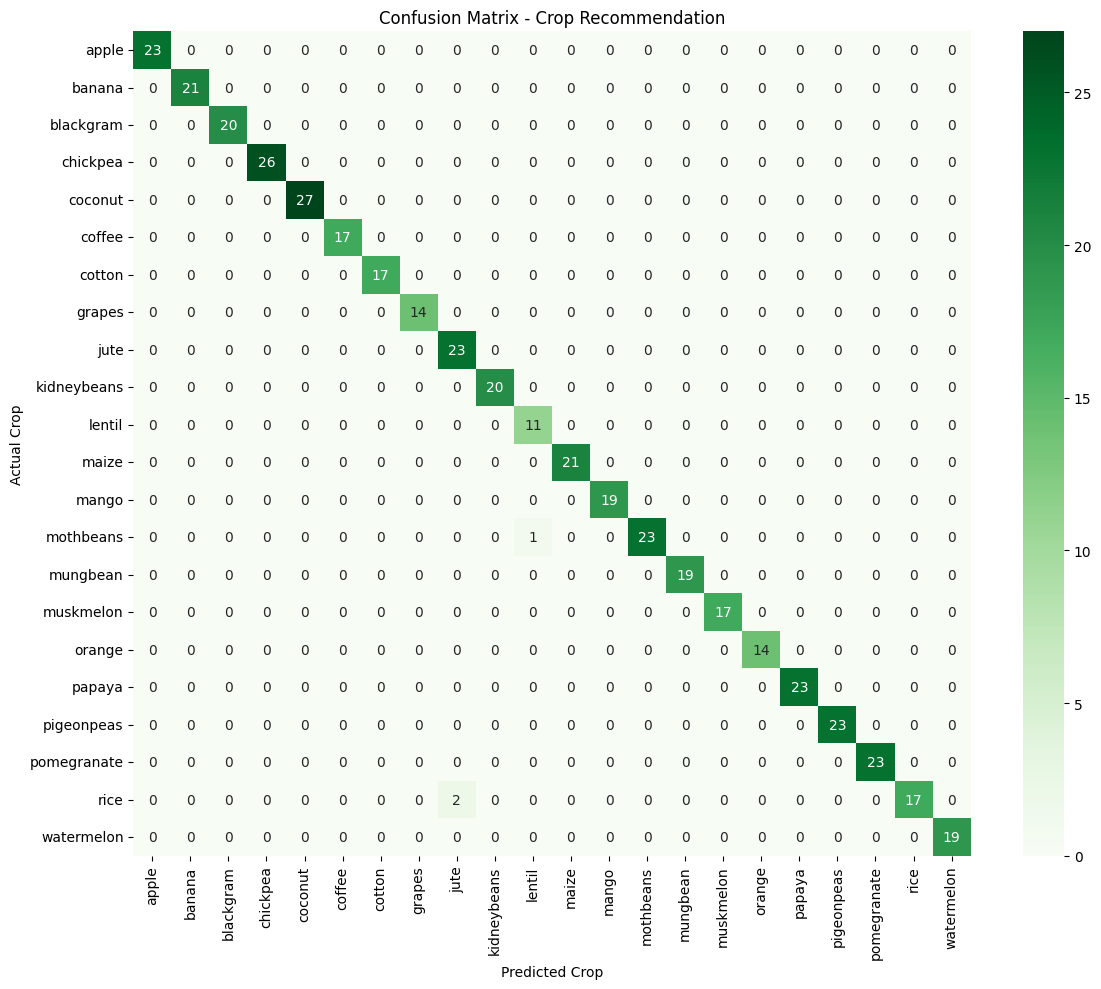

In [21]:
# Visualize performance using confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Crop Recommendation")
plt.xlabel("Predicted Crop")
plt.ylabel("Actual Crop")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [22]:
# Try a sample prediction
sample_input = [[90, 42, 43, 20.87, 82.00, 6.5, 202]]
predicted_class = model.predict(sample_input)
predicted_crop = le.inverse_transform(predicted_class)
print("Recommended Crop:", predicted_crop[0])


Recommended Crop: rice


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [23]:
# Build a GUI using Gradio
import gradio as gr
import numpy as np

# Function to predict and return crop name
def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    prediction = model.predict(input_data)
    crop_name = le.inverse_transform(prediction)[0]
    return f"✅ Recommended Crop: {crop_name}"


In [25]:
# Build the interface layout
with gr.Blocks(theme=gr.themes.Soft()) as interface:
    gr.Markdown("## 🌾 Crop Recommendation System")
    gr.Markdown("Provide the soil and environmental data to get the best crop recommendation for your land.")

    with gr.Row():
        with gr.Column():
            N = gr.Slider(0, 140, step=1, label="🧪 Nitrogen (N)", value=60)
            P = gr.Slider(5, 145, step=1, label="🧪 Phosphorous (P)", value=40)
            K = gr.Slider(5, 205, step=1, label="🧪 Potassium (K)", value=60)
            ph = gr.Slider(3.5, 9.5, step=0.1, label="🌱 pH Level", value=6.5)
        with gr.Column():
            temperature = gr.Slider(10, 45, step=0.1, label="🌡️ Temperature (°C)", value=25)
            humidity = gr.Slider(10, 100, step=1, label="💧 Humidity (%)", value=65)
            rainfall = gr.Slider(0, 300, step=1, label="🌧️ Rainfall (mm)", value=100)

    submit_btn = gr.Button("🚀 Recommend Crop")
    output = gr.Textbox(label="Prediction", placeholder="Your crop recommendation will appear here.")

    submit_btn.click(
        fn=predict_crop,
        inputs=[N, P, K, temperature, humidity, ph, rainfall],
        outputs=output
    )

interface.launch(debug=True)


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://67426e61014e8ad18d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://67426e61014e8ad18d.gradio.live
